In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data load/ csv file read
df = pd.read_csv("D:\Datascince_Project\Hr- employee Prediction\Data\hr (3).csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
14999,0.71,0.66,5,187,2,0,0,0,sales,medium,NaN
15000,0.75,0.84,3,145,3,1,0,0,support,low,NaN
15001,0.32,0.41,3,138,3,1,0,0,technical,medium,29.0
15002,0.62,0.58,3,148,2,1,0,0,technical,low,NaN
15003,0.81,0.94,3,225,4,0,0,0,hr,medium,NaN


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

**About Dataset :-**
These columns likely represent various attributes or features of employees in a company. 

1. satisfaction_level: Employee satisfaction score.
2. last_evaluation: Score from the employee's last performance review.
3. number_project: Number of projects the employee is/was involved in.
4. average_montly_hours: Average monthly hours worked by the employee.
5. time_spend_company: Number of years the employee has been with the company.
6. Work_accident: Indicator of whether the employee had a work accident (1 for yes, 0 for no).
7. left: Indicator of whether the employee has left the company (1 for yes, 0 for no).
8. promotion_last_5years: Indicator of whether the employee was promoted in the last 5 years (1 for yes, 0 for no).
9. Department: Department or division where the employee works.
10. salary: Salary level of the employee (low, medium, high).
11. age: Age of the employee.

#### **Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


Here all the columns has 15004 non-null values out of 15004 values except Salary and age columns which has 14975 and 3080 non-null values correpondingly.

In [7]:
df.shape

(15004, 11)

In [8]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

The column Salary has 29 null values  and age jas 11924 null values.


Here columns has more than 75% values are null so we can just dop this column.

In [9]:
df.drop(columns=['age'],inplace=True)

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
df.duplicated().sum()


2998

In [12]:
# droping the duplicated values
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(12006, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  object 
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 11977 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


In [15]:
df.dtypes['salary']

dtype('O')

In [16]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [17]:
df['salary'].fillna('Unknown', inplace=True)

In [18]:
# Fill missing values in the 'salary' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  object 
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 12006 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


#### **Exploratory Data Analysis (EDA)**

In [19]:
# Monthly Hours
df['average_montly_hours'].unique()

array([175, 155, 154, 256, 275, 148, 141, 144, 185, 272, 171, 127, 149,
       157, 277, 243, 267, 192, 238, 143, 191, 221, 137, 160, 179, 181,
       249, 266, 284, 128, 276, 138, 205, 273, 231, 206, 214, 260, 145,
       216, 223, 142, 139, 264, 167, 246, 187, 136, 121, 286, 232, 131,
       213, 182, 204, 239, 224, 172, 263, 242, 235, 153, 147, 199, 289,
        98, 200, 184, 124, 183, 274, 258, 241, 197, 132, 212, 201, 278,
       211, 162, 307, 152, 247, 159, 133, 271, 173, 140, 229, 218, 165,
       164, 244, 109, 253, 100, 262, 255, 122, 203, 261, 215, 245, 240,
       169, 170, 193, 208, 254, 299, 111, 269, 117, 110, 294, 108, 180,
       186, 234, 129, 287, 251, 248, 194, 156, 270, 237, 174, 222, 250,
       228, 134, 112, 259, 290, 217, 257, 210, 225, 226, 301, 198, 209,
       202, 115, 236, 151, 219, 268, 177, 252,  97, 161, 135, 190, 265,
       220, 233, 227, 308, 120, 230, 146, 189, 196, 163, 158, 104, 285,
       207, 176, 195, 298, 125, 168, 114, 302, 113, 178, 123, 18

In [20]:
bins = len(df['average_montly_hours'].unique())
bins

215

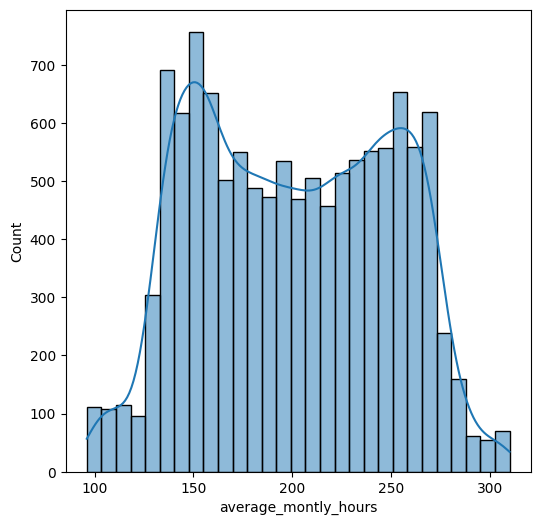

In [21]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = df['average_montly_hours'], kde=True)
plt.show()

In [22]:
#  Number of Projets that person has done
df['number_project'].value_counts()

number_project
4    3690
3    3525
5    2235
2    1583
6     828
7     145
Name: count, dtype: int64

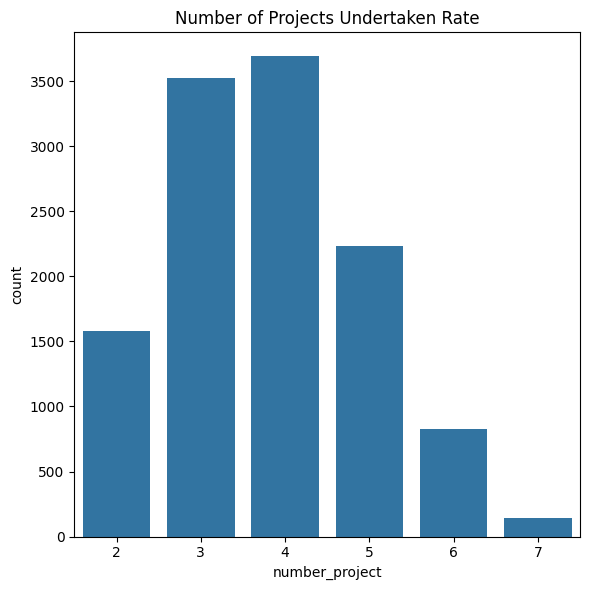

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="number_project")
plt.title("Number of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

In [24]:
# Promotion made in the last 5 years
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11803
1      203
Name: count, dtype: int64

This shows that most people didn't get promoted in the last five years only 203 people got promoted in the last five years.

* 1 => person got promoted 
* 0 => person was not promoted

In [25]:
labels = df['promotion_last_5years'].value_counts().index.tolist()
labels

[0, 1]

([<matplotlib.patches.Wedge at 0x1469b757ce0>,
 [Text(-1.098448483042589, 0.058403168590715655, '0'),
  Text(1.0984484799667815, -0.05840322644056107, '1')],
 [Text(-0.5991537180232303, 0.03185627377675399, '98.31%'),
  Text(0.5991537163455172, -0.031856305331215126, '1.69%')])

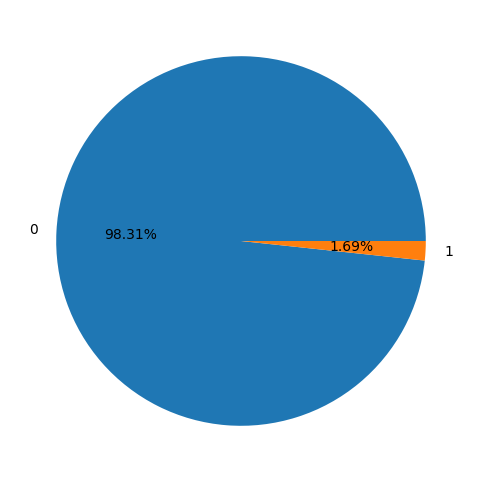

In [26]:
plt.figure(figsize=(6,6))
plt.pie(x=df['promotion_last_5years'].value_counts(),labels=labels, autopct='%1.2f%%')


In [27]:
labels = ['Promoted' if i==1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

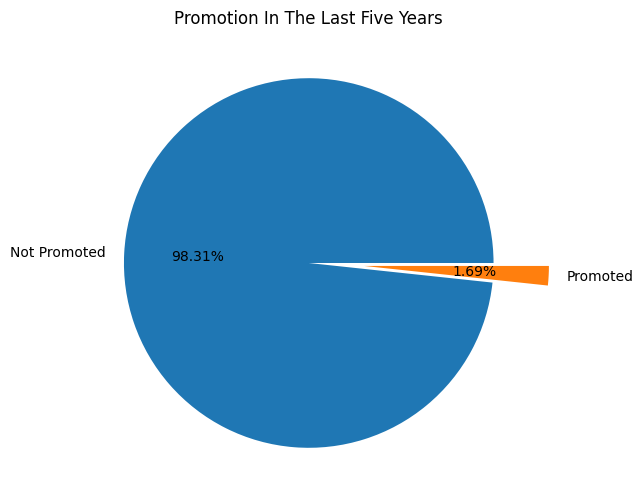

In [28]:
plt.figure(figsize=(6,6))
plt.pie(x=df['promotion_last_5years'].value_counts(),labels=labels, autopct='%1.2f%%', explode = [0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.show()

In [29]:
# Work Accidents
df['Work_accident'].value_counts()

Work_accident
0    10155
1     1851
Name: count, dtype: int64

0 =>  person never had a work accident
1 => The person under work accident 

here , only 1851 persons had work accidents.

In [30]:
labels = df['Work_accident'].value_counts().index.tolist()
labels

[0, 1]

In [31]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [33]:
labels = ['Work Accident' if i==1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

TypeError: 'function' object is not subscriptable

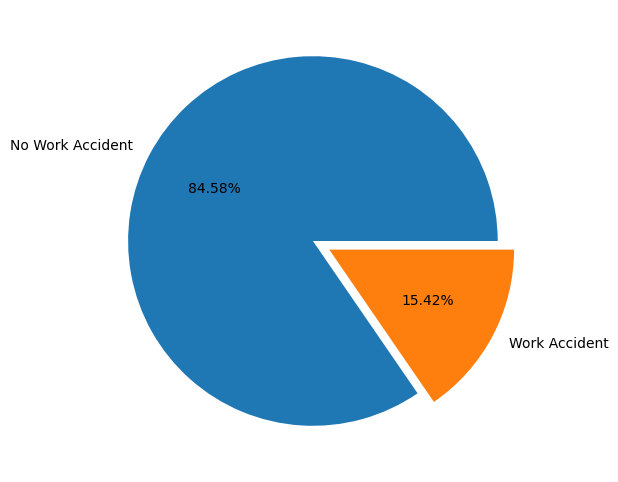

In [35]:
plt.figure(figsize=(6,6))
plt.pie(x=df['Work_accident'].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title['Work Accident']
plt.show()

This shows , 84.58% of the people never had a work accident while 15.42% of the people had a work accident.

In [37]:
# Time Spent in Company
df['time_spend_company'].value_counts()

time_spend_company
3     5194
2     2916
4     2007
5     1065
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [38]:
labels = df['time_spend_company'].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

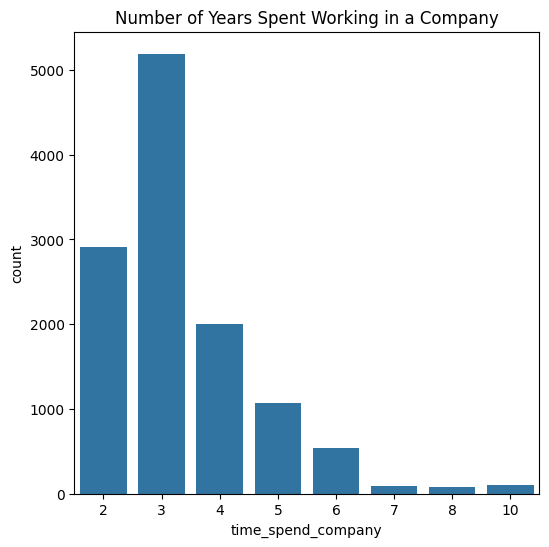

In [39]:
plt.figure(figsize=(6,6))
sns.countplot( x = "time_spend_company",data=df)
plt.title("Number of Years Spent Working in a Company")
plt.show()

In [40]:
df['time_spend_company'].mean()

3.364567716141929

#### Department Comparision 


In [44]:
df['Department'].unique()

array(['IT', 'hr', 'support', 'product_mng', 'sales', 'technical',
       'marketing', 'management', 'accounting', 'RandD'], dtype=object)

In [45]:
df['Department'].value_counts()

Department
sales          3241
technical      2244
support        1826
IT              979
RandD           695
product_mng     688
marketing       673
accounting      621
hr              601
management      438
Name: count, dtype: int64

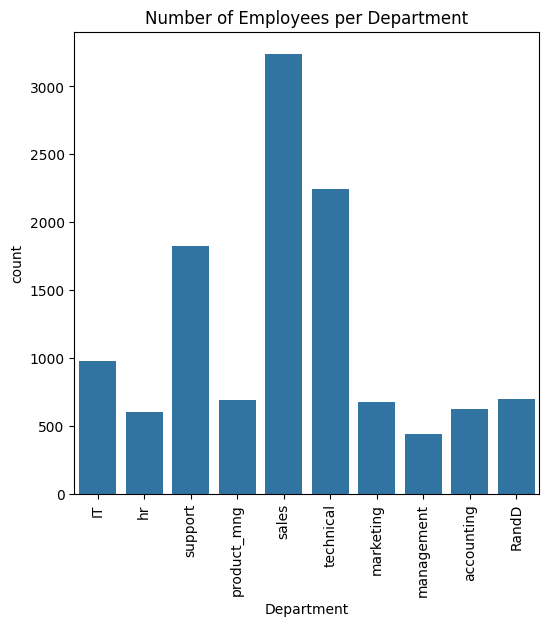

In [48]:
plt.figure(figsize=(6,6))
sns.countplot( x = "Department",data=df)
plt.title("Number of Employees per Department")
plt.xticks(rotation=90)
plt.show()

In [52]:
# Salary Comparision
df['salary'].unique()

array(['low', 'medium', 'high', 'Unknown'], dtype=object)

In [53]:
df['salary'].value_counts()

salary
low        5724
medium     5263
high        990
Unknown      29
Name: count, dtype: int64

In [55]:
labels = df['salary'].value_counts().index.tolist()
labels

['low', 'medium', 'high', 'Unknown']

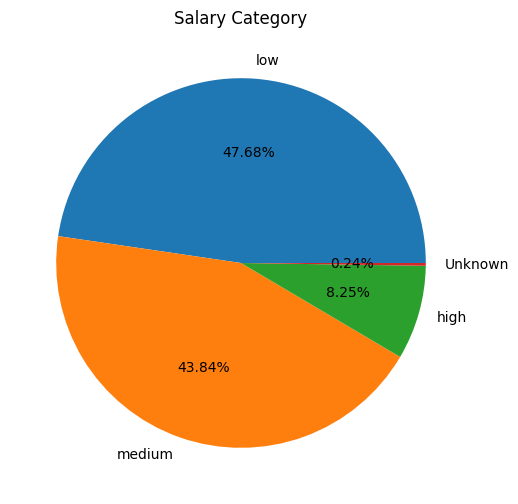

In [57]:
plt.figure(figsize=(6,6))
plt.pie(x=df['salary'].value_counts(),labels=labels, autopct='%1.2f%%')
plt.title("Salary Category")
plt.show()

This pie chart shows, 
* 47.68% employees are getting low salary.
* 43.84% employees are getting medium salary.
* 8.25% employees are getting high salary.
* 0.24% are unknown .

In [58]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### **Data Preprocessing**

In [61]:
df.rename(columns={"salary":"salary_level"}, inplace=True)

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary_level'],
      dtype='object')

#### Categorical Encoding

In [65]:
categorical_cols = ['Department','salary_level']
encoded_cols = pd.get_dummies(df[categorical_cols], prefix = "cat")

In [66]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_Unknown,cat_high,cat_low,cat_medium
0,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14998,False,False,False,False,False,True,False,False,False,False,False,False,True,False
15000,False,False,False,False,False,False,False,False,True,False,False,False,True,False
15001,False,False,False,False,False,False,False,False,False,True,False,False,False,True
15002,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [67]:
df = df.join(encoded_cols)

In [68]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level,...,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_Unknown,cat_high,cat_low,cat_medium
0,0.24,0.79,2,175,5,0,0,0,IT,low,...,False,False,False,False,False,False,False,False,True,False
1,0.40,0.49,2,155,3,0,1,0,hr,medium,...,False,False,False,False,False,False,False,False,False,True
2,0.45,0.45,2,154,3,1,1,0,support,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,...,False,False,True,False,False,False,False,True,False,False
4,0.14,0.54,5,275,4,1,0,0,sales,high,...,False,False,False,True,False,False,False,True,False,False


In [71]:
df.drop(['Department','salary_level'], inplace=True, axis="columns")

In [72]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_Unknown', 'cat_high',
       'cat_low', 'cat_medium'],
      dtype='object')

#### Min Max Scaling

In [74]:
df['average_montly_hours'].min()

96

In [75]:
df['average_montly_hours'].max()

310

#### Split Data into Train and Test

In [76]:
X = df.drop('left',axis=1)
y=df['left']
